### Importing libraries

In [151]:
# Import Dependencies
%matplotlib inline

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
from matplotlib import style
import missingno as msno
import seaborn as sns
#import sweetviz
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn import impute
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline 
from sklearn.metrics import plot_confusion_matrix, roc_curve, accuracy_score 
from sklearn.model_selection import cross_val_score, train_test_split 

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')


### Loading dataset

In [152]:
file = pd.read_csv("heart.csv")

## Step 1: Exploring Data Analysis (EDA)
 The objectives of the EDA are as follows:-

i. To get an overview of the distribution of the dataset.

ii. Check for missing numerical values, outliers or other anomalies in the dataset.

iii.Discover patterns and relationships between variables in the dataset.

iv. Check the underlying assumptions in the dataset.

In [153]:
file.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [154]:
file.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [155]:
file.shape

(303, 14)

In [156]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Dataset description 
The dataset contains several columns which are as follows -

**age**: The person's age in years

**sex**: The person's sex (1 = male, 0 = female)

**cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

**trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)

**chol**: The person's cholesterol measurement in mg/dl

**fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing 
probable or definite left ventricular hypertrophy by Estes' criteria)

**thalach**: The person's maximum heart rate achieved

**exang**: Exercise induced angina (1 = yes; 0 = no)

**oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

**slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

**ca**: The number of major vessels (0-3)

**thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

**target**: Heart disease (0 = no, 1 = yes)

#### Important points about the dataset:
The features: `sex`,`fbs`,`exang` and the `target` column hold binary values '1' or '0' and have datatype of int64.

In [157]:
#View column names
file.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [158]:
file.columns = ['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_angina', 'st_depression', 'st_slope', 'major_vessels', 'thalassemia', 'target']

### Check for missing values in features in train dataset

In [159]:
#How many missing values in each column
file.isna().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholesterol            0
fasting_blood_sugar    0
rest_ecg               0
max_heart_rate         0
exercise_angina        0
st_depression          0
st_slope               0
major_vessels          0
thalassemia            0
target                 0
dtype: int64

Looks like there are no missing values in all the features!

<AxesSubplot:>

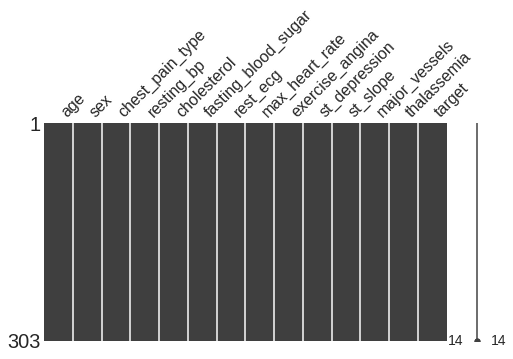

In [160]:
# Alternatively, we can also plot graph to check for missing values
msno.matrix(file, figsize=(8,4))

### Vizualizations

### Univariate distribution of features

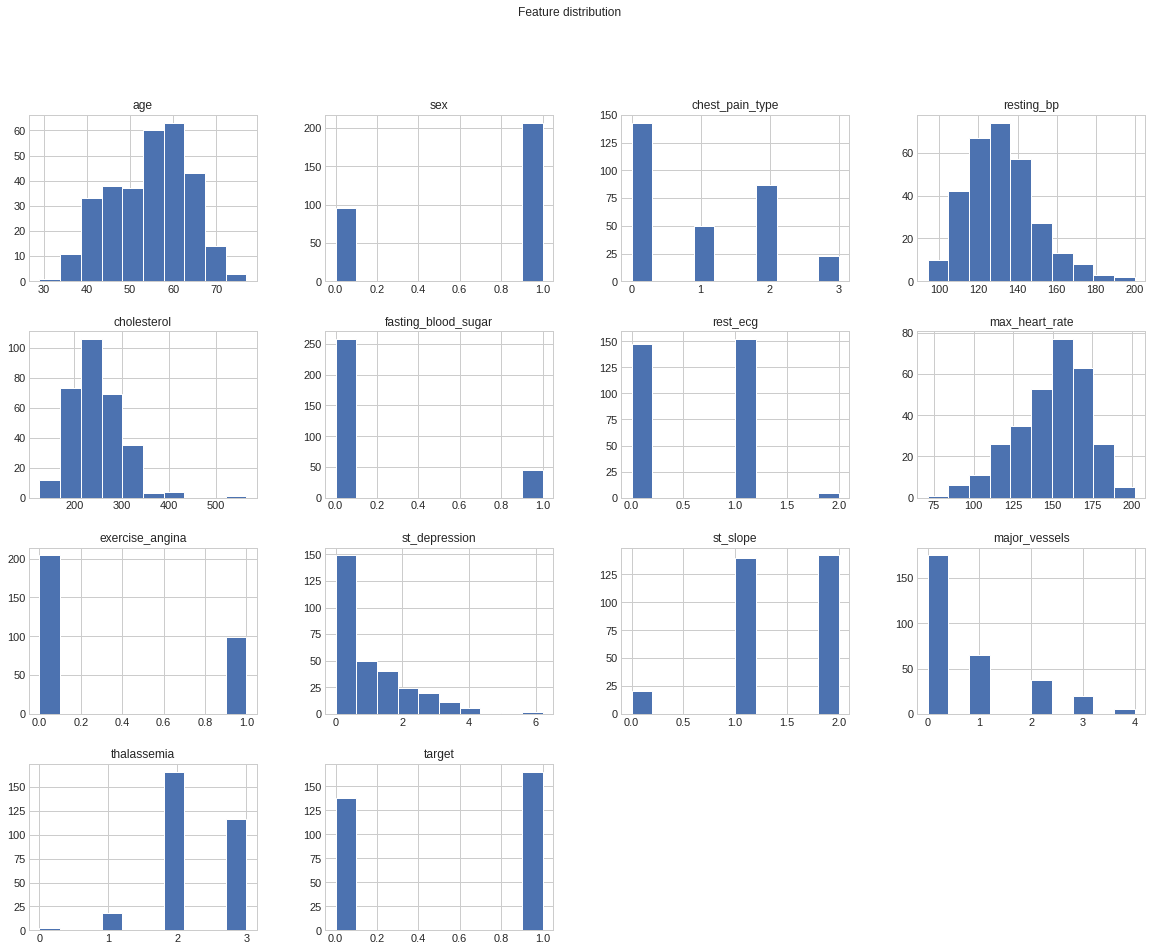

In [161]:
#Checking distribution of all features using histogram
file.hist(figsize=[20,15])
plt.suptitle("Feature distribution")
plt.show()

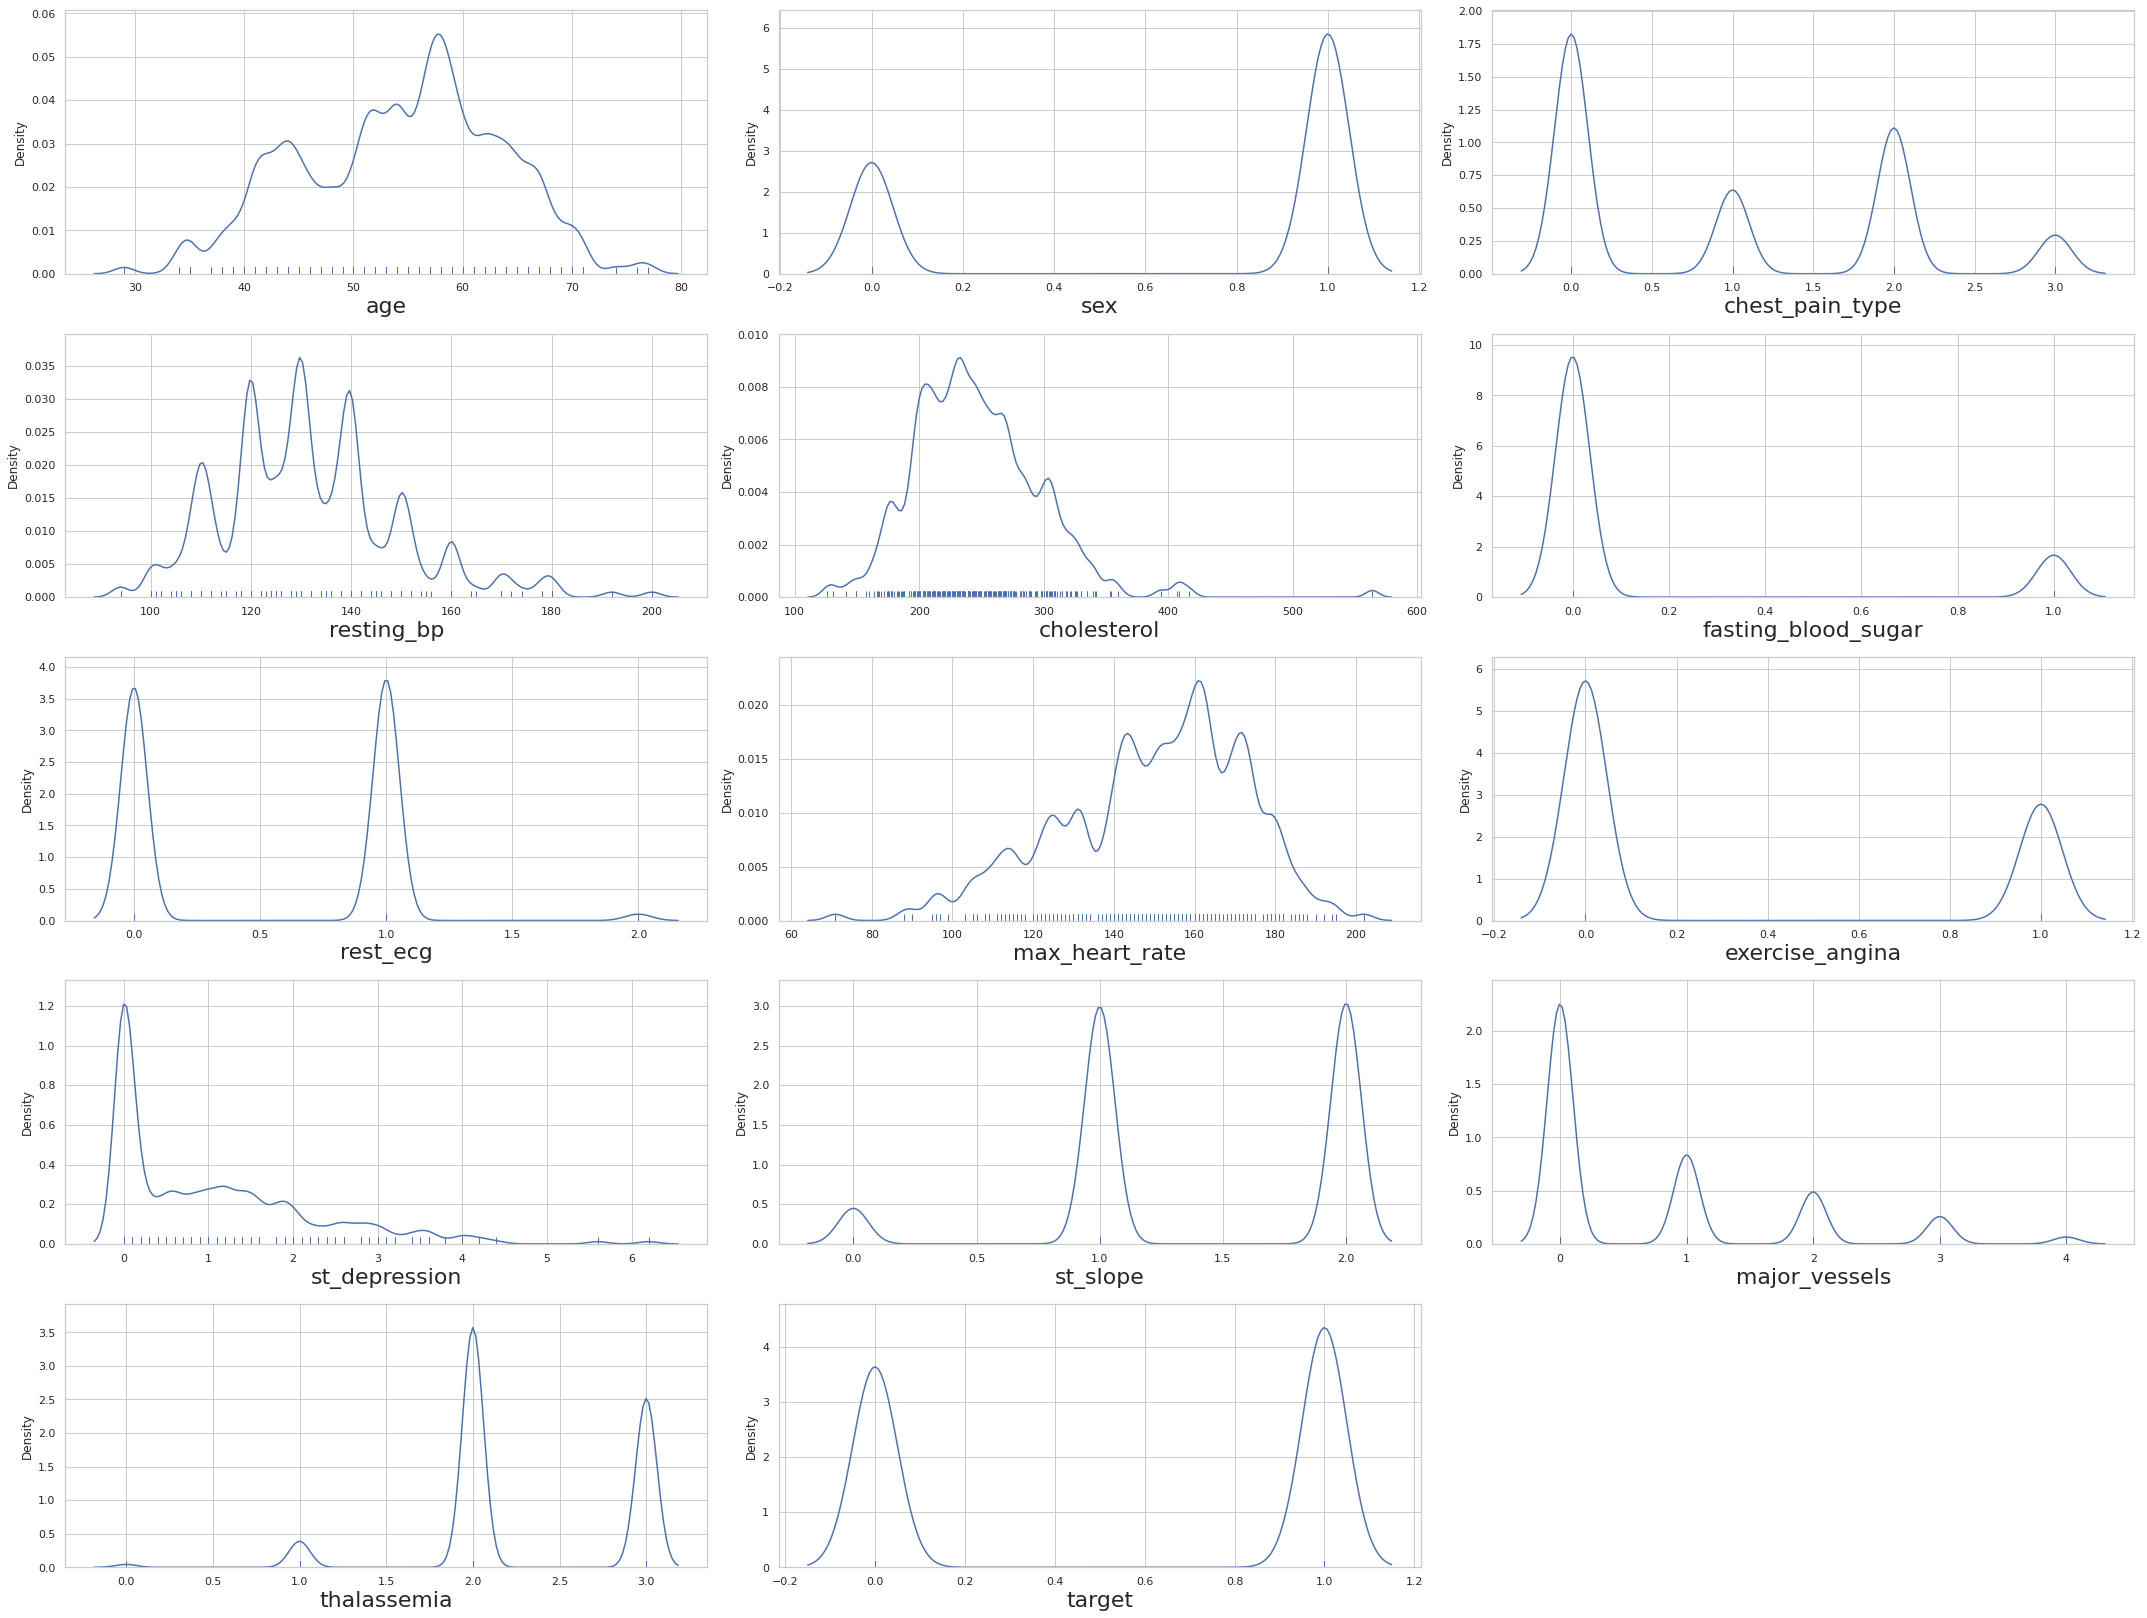

In [162]:
#ALternative for viewing distribution of features
fig = plt.figure(figsize = (30,40))
sns.set(style = 'whitegrid')
for i in range(len(file.columns)):
    fig.add_subplot(9, 3, i+1)
    sns.distplot(file.iloc[:,i].dropna(), rug = True, hist = False, kde_kws = {'bw':0.1}, color = 'b')
    plt.xlabel(file.columns[i], fontsize=22)
plt.tight_layout()

### Univariate analysis using boxplot

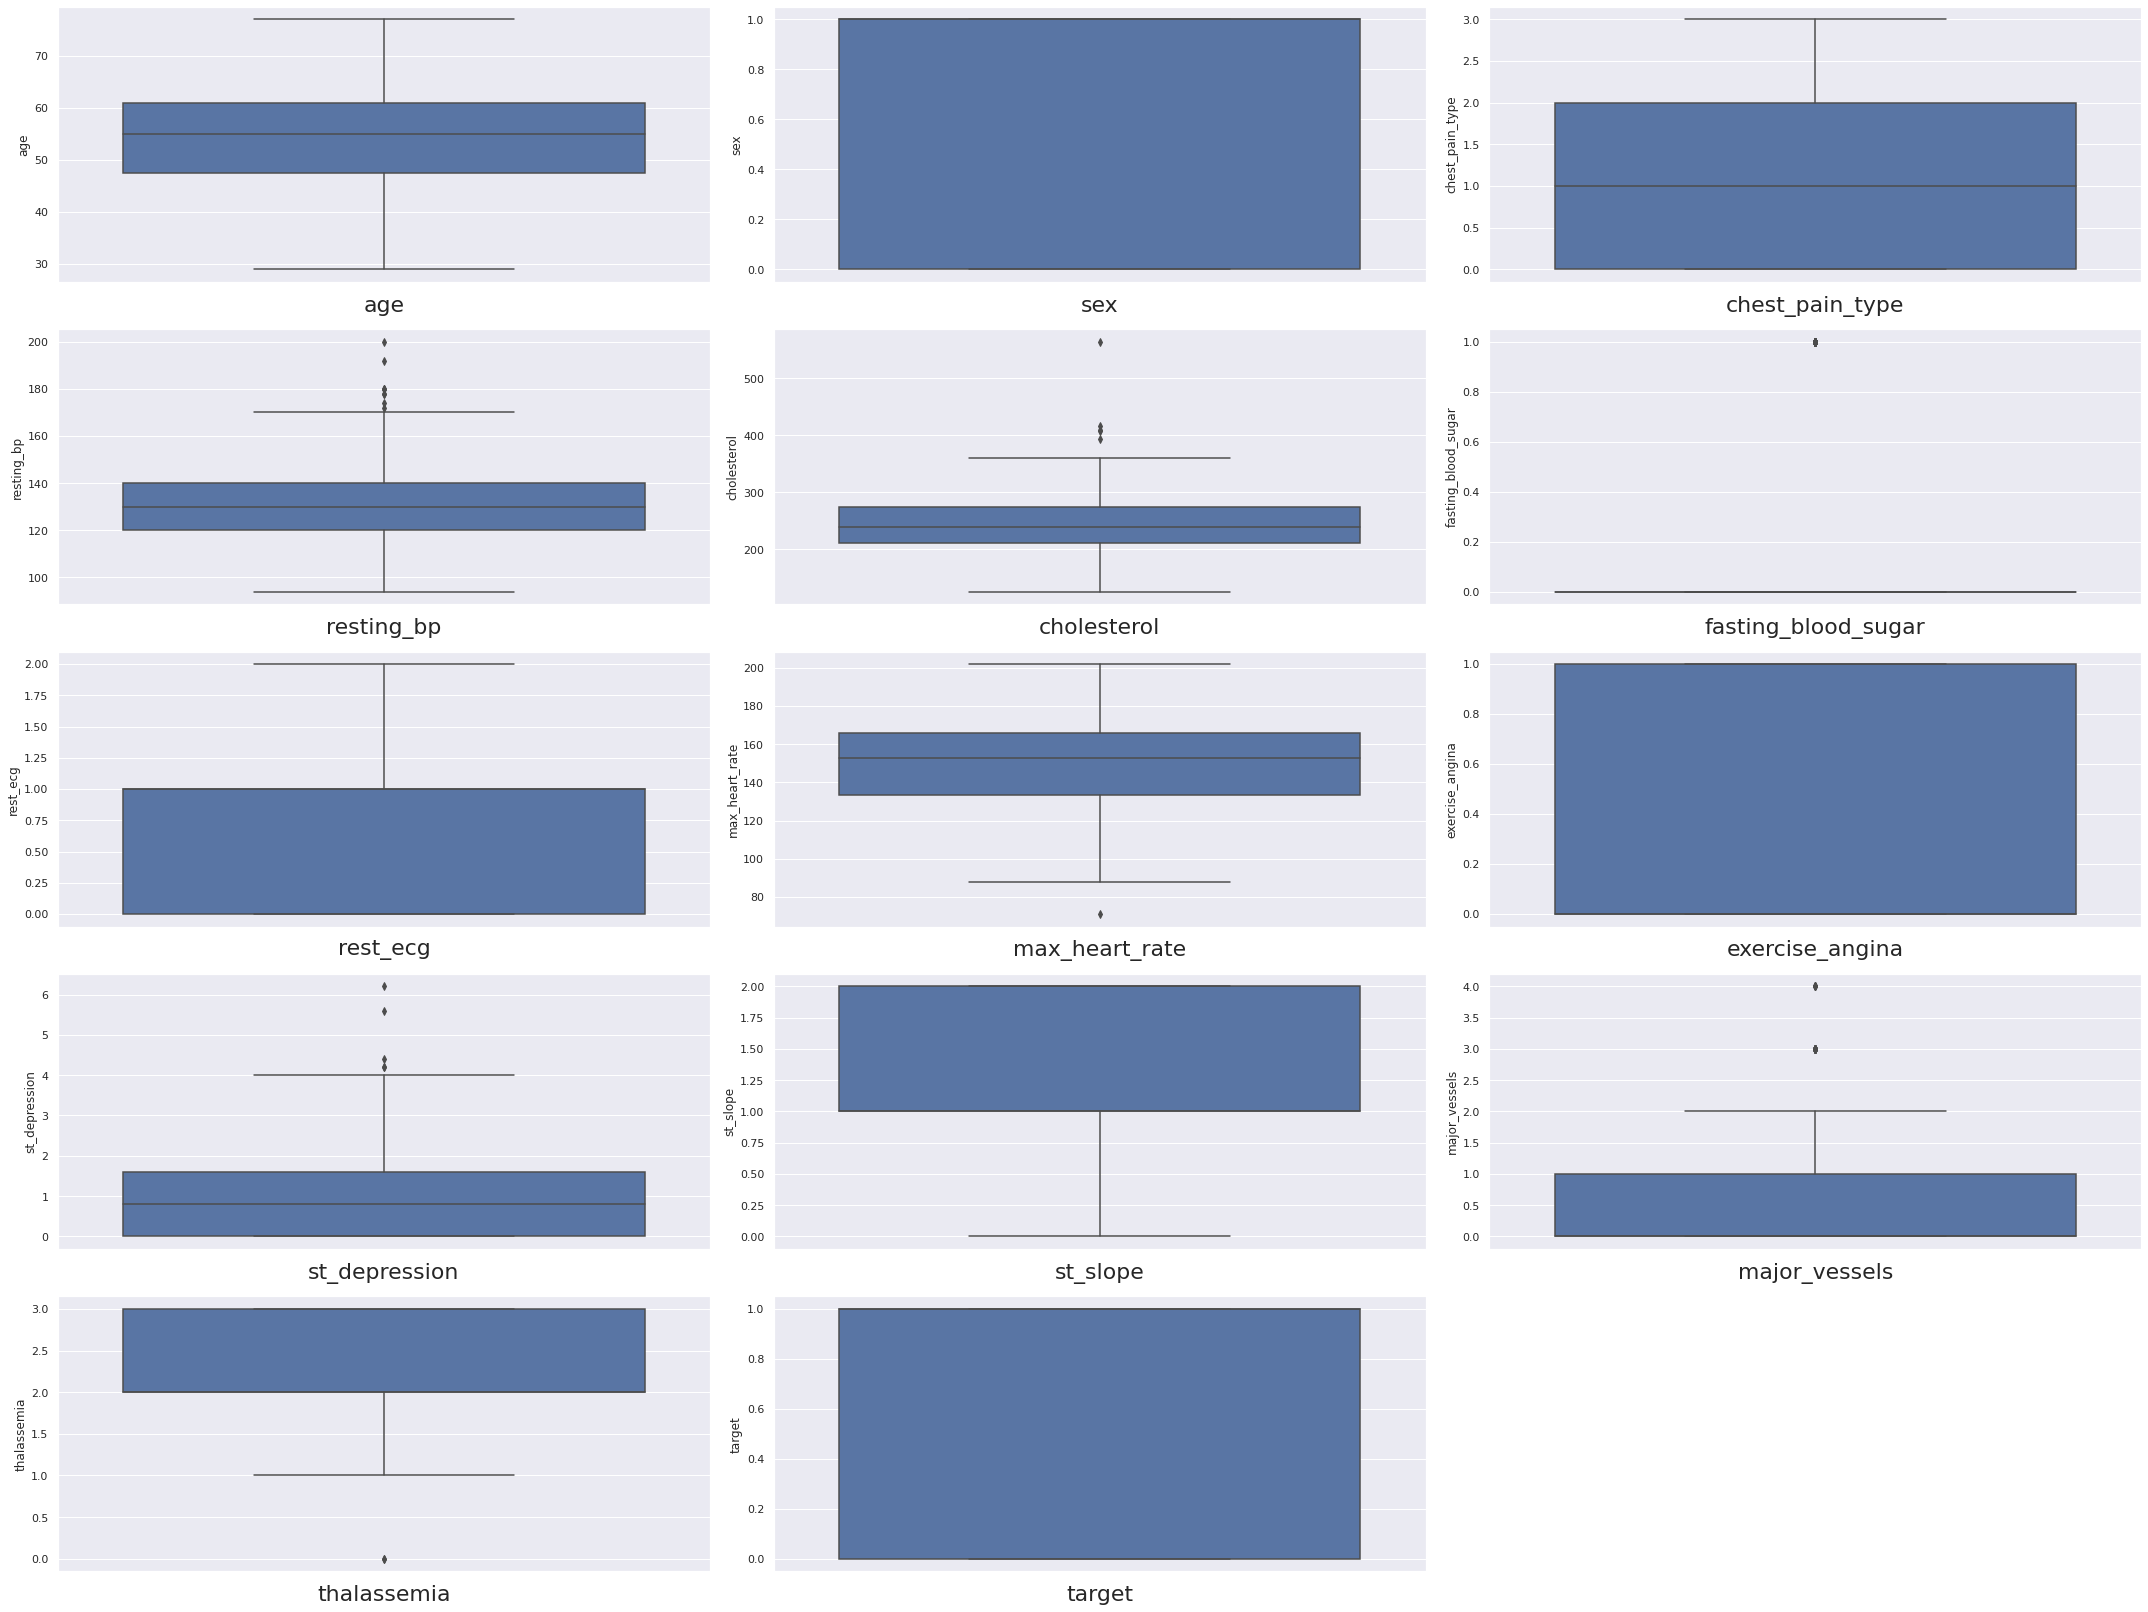

In [163]:
#Can be useful to check outliers

fig = plt.figure(figsize = (30,40))
sns.set(style = 'darkgrid')
for i in range(len(file.columns)):
    fig.add_subplot(9, 3, i+1)
    sns.boxplot(y = file.iloc[:,i].dropna())
    plt.xlabel(file.columns[i], fontsize=22)
plt.tight_layout()

In [164]:
# splitting dataset into numerical and categorical features:
numeric_features = file[["age","chest_pain_type","resting_bp",
       "cholesterol","max_heart_rate","st_depression",
       "major_vessels","thalassemia"
]]

categorical_features=file[[
       "sex","rest_ecg","fasting_blood_sugar",
        "exercise_angina","st_slope"
]]

### Bivariate analysis using scatter plot

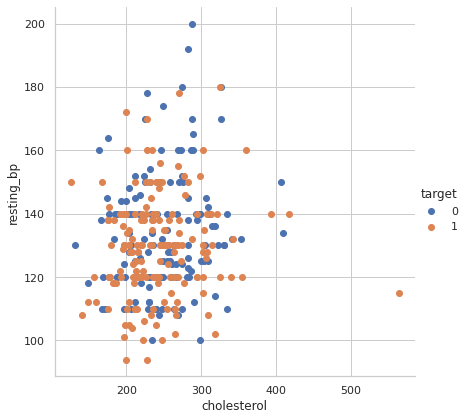

In [165]:
sns.set_style("whitegrid")
sns.FacetGrid(file, hue = "target" , height = 6).map(plt.scatter,'cholesterol',"resting_bp").add_legend()


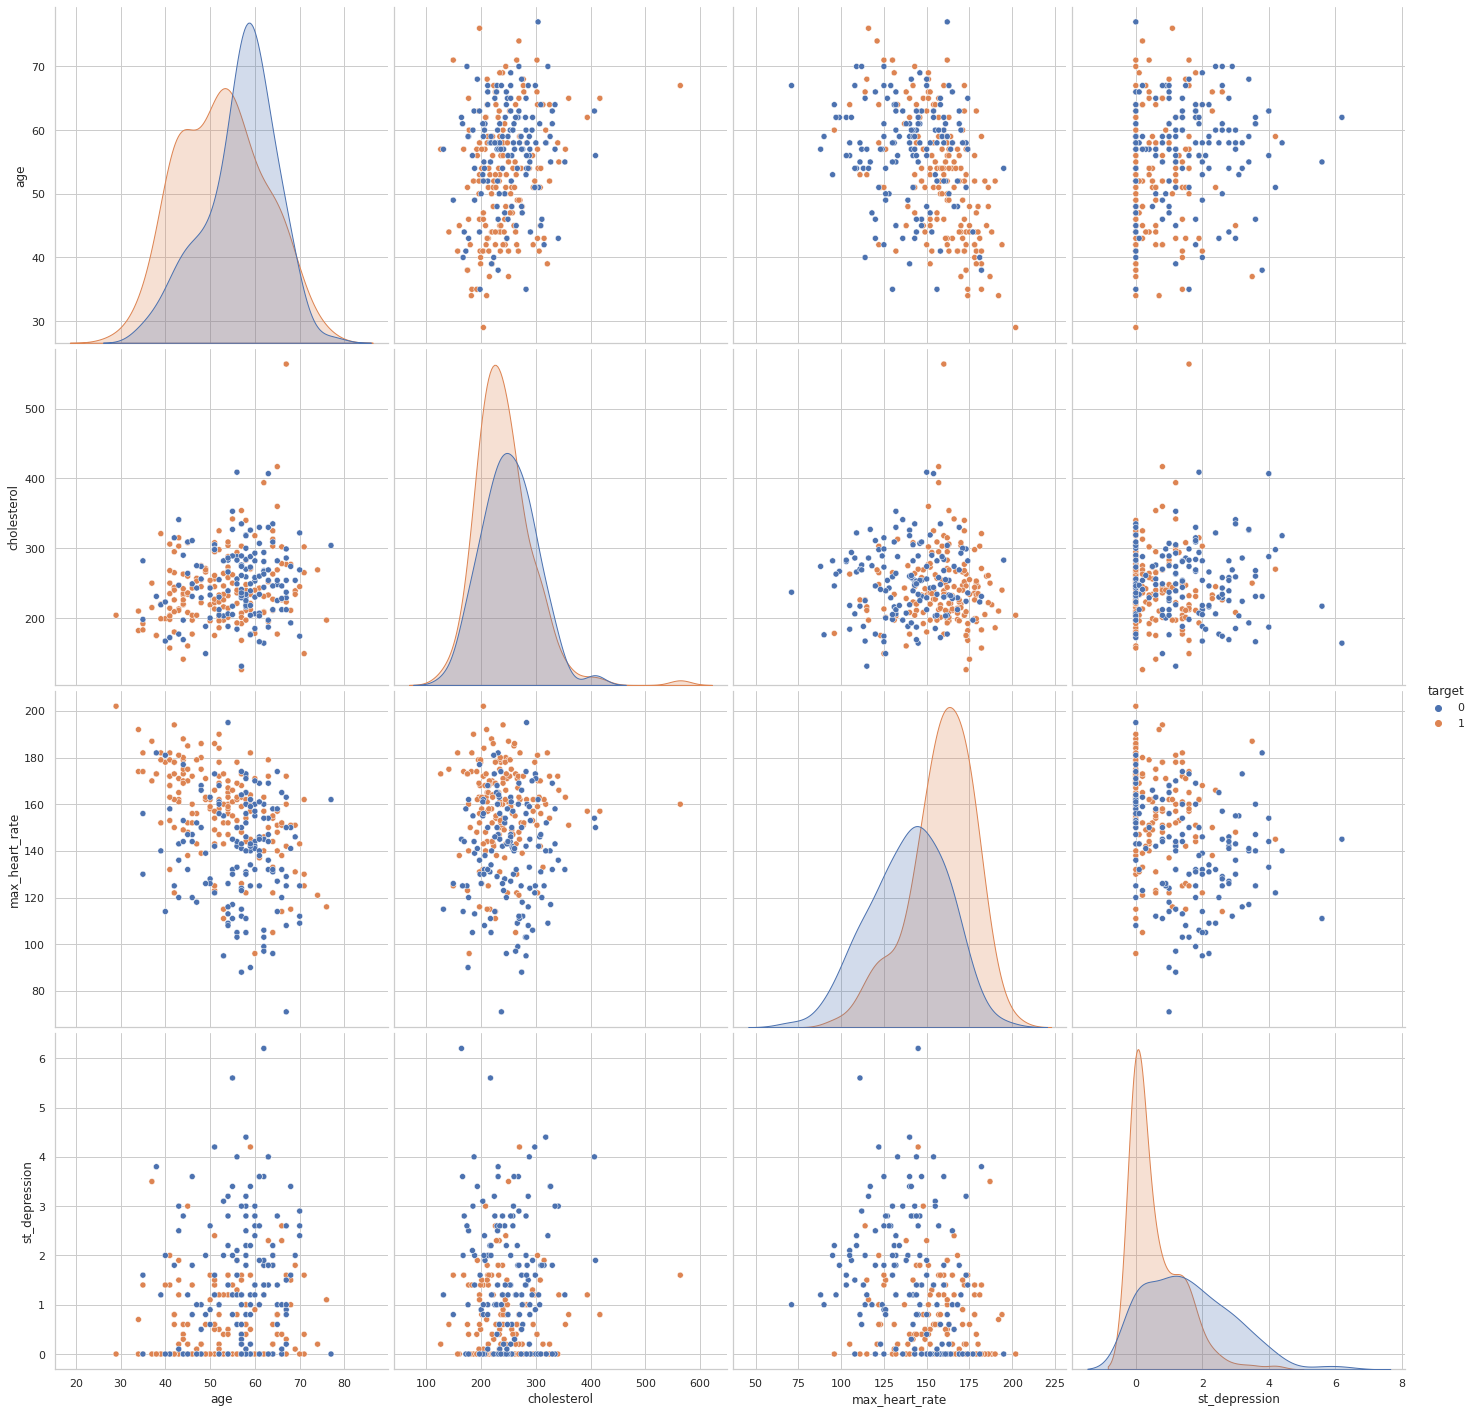

In [166]:
selected_features = file[["age","cholesterol",'max_heart_rate','st_depression',"target"]]
sns.set_style("whitegrid")
sns.pairplot(selected_features, hue = "target", height = 5)

<AxesSubplot:>

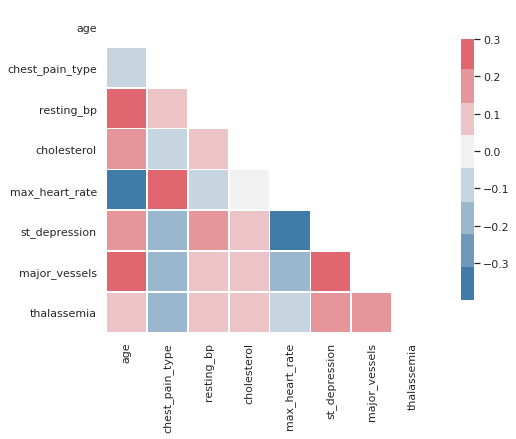

In [167]:
# Correlation between numeric features

corr =  numeric_features.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})


#### Insights:
- High correlation exists between age and cholesterol
- HIgher correlation exists between age and resting blood pressure
- there is also high correlation between chest pain type and maximum heart rate


<AxesSubplot:>

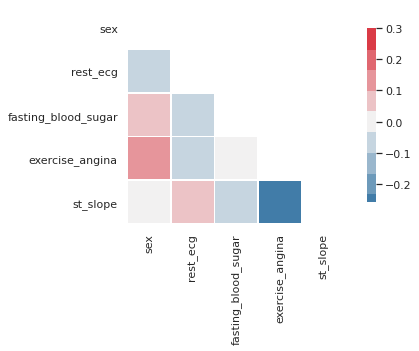

In [168]:
#Correlation between categorical features

corr =  categorical_features.corr()

#create a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})


In [169]:
file.shape

(303, 14)

<AxesSubplot:>

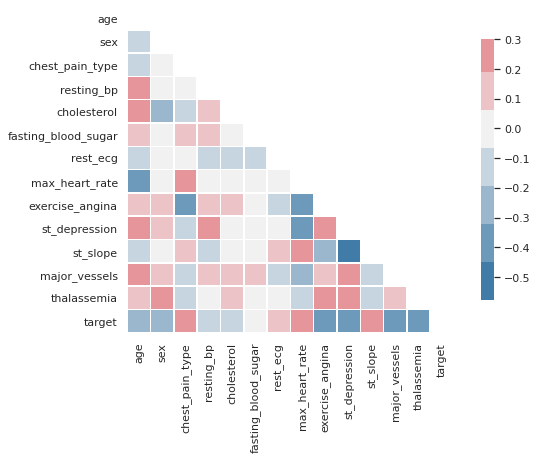

In [170]:
# Correlation for original df

corr =  file.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, n=9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

From the above correlation matrix, we can tell that the most correlated features are: `chest_pain_type`, `max_heart_rate` and `st_slope`

## Step 2: Data Pre-processing (Feature Engineering, train/val/test split)
- One hot-encoding of categorical features
- Train/val/test split (80/10/10)
- New features?
- Data augmentation

### Getting labels from dataset

In [171]:
data_X = file.drop('target',axis=1)
labels = file['target']

In [172]:
# Split the dataset into train and test in 80/20 ratio
x_train,x_test,y_train,y_test=train_test_split(data_X,labels,test_size=0.2,random_state=42)

In [173]:
print('x_train',X_train.shape)
print('x_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (242, 13)
x_test (61, 13)
y_train (242,)
y_test (61,)


We now have 242 training data examples and 61 test examples

## Step 3: Model Building (training, fine-tuning, evaluation)
- Ensemble of models - Logistic Regression, Decision Tree, Random Forests, Naive Bayes, SVM, kNN classification
- Train on X_train, evalauation on X_val
- Create plots on train and val set.
- Experiment with a variety of hyperparameters (learning rate, optimizer, num of epochs etc.)
- Freeze Final model: High train accuracy and high val accuracy 

In [174]:
#Logistic Regression

log_reg = LogisticRegression(random_state=0,class_weight='balanced')
log_reg.fit(x_train, y_train)
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
train_acc = accuracy_score(y_train, log_reg.predict(x_train))
test_acc = accuracy_score(y_test, log_reg.predict(x_test))

print('Training Accuracy for Logistic reg. is {:.2f}'.format(train_acc*100))
print('-'*25)
print('Testing Accuracy for Logistic reg. is {:.2f}'.format(test_acc*100))
print('-'*25)
print(classification_report(y_test,log_reg.predict(x_test)))


Training Accuracy for Logistic reg. is 87.19
-------------------------
Testing Accuracy for Logistic reg. is 86.89
-------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



<AxesSubplot:>

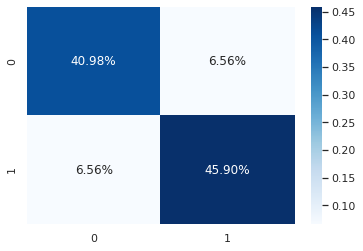

In [175]:
cf_matrix = confusion_matrix(y_test, log_reg.predict(x_test))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


In [176]:
# KNN 

max_acc = 0.0
neighbours = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i,p=1)
    knn.fit(x_train, y_train)
    test_acc = accuracy_score(y_test, knn.predict(x_test))
    if(test_acc>max_acc):
        max_acc = test_acc
        neighbours = i
knn = KNeighborsClassifier(n_neighbors=neighbours)
knn.fit(x_train, y_train)
train_acc = accuracy_score(y_train, knn.predict(x_train))

print('Training Accuracy for kNN is {:.2f} with {} neighbours'.format(train_acc*100, neighbours))
print('-'*25)
print('Maximum Testing Accuracy for kNN is {:.2f} with {} neighbours'.format(max_acc*100, neighbours))
print('-'*25)
print(classification_report(y_test,knn.predict(x_test)))


Training Accuracy for kNN is 75.21 with 6 neighbours
-------------------------
Maximum Testing Accuracy for kNN is 73.77 with 6 neighbours
-------------------------
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        29
           1       0.74      0.72      0.73        32

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



<AxesSubplot:>

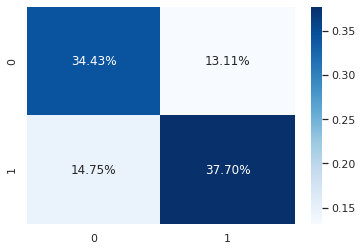

In [177]:
cf_matrix = confusion_matrix(y_test, knn.predict(x_test))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')


In [178]:
#SVM

svm = SVC(kernel='linear') # Linear Kernel
svm.fit(x_train, y_train)
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, svm.predict(x_train))
test_acc = accuracy_score(y_test, svm.predict(x_test))

print('Training Accuracy for SVM is {:.2f}'.format(train_acc*100))
print('-'*25)
print('Testing Accuracy for SVM is {:.2f}'.format(test_acc*100))
print('-'*25)
print(classification_report(y_test,svm.predict(x_test)))


Training Accuracy for SVM is 86.36
-------------------------
Testing Accuracy for SVM is 86.89
-------------------------
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



<AxesSubplot:>

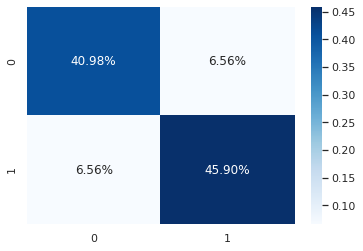

In [179]:
cf_matrix = confusion_matrix(y_test, svm.predict(x_test))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [180]:
#Decision Tree 

dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, dec_tree.predict(x_train))
test_acc = accuracy_score(y_test, dec_tree.predict(x_test))

print('Training Accuracy for decision tree is {:.2f}'.format(train_acc*100))
print('-'*25)
print('Testing Accuracy for decision tree is {:.2f}'.format(test_acc*100))
print('-'*25)
print(classification_report(y_test,dec_tree.predict(x_test)))

Training Accuracy for decision tree is 100.00
-------------------------
Testing Accuracy for decision tree is 81.97
-------------------------
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



<AxesSubplot:>

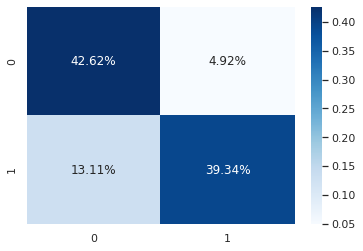

In [181]:
cf_matrix = confusion_matrix(y_test, dec_tree.predict(x_test))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [182]:
# Random Forest

rf = RandomForestClassifier(n_estimators=5,min_samples_split=15,random_state = 0, class_weight='balanced_subsample')
rf.fit(x_train, y_train)
test_acc = accuracy_score(y_test, rf.predict(x_test))
train_acc = accuracy_score(y_train, rf.predict(x_train))
print('-'*25)
print('Training Accuracy for random forest is {:.2f}'.format(train_acc*100))
print('-'*25)
print('Testing Accuracy for random forest is {:.2f}'.format(test_acc*100))
print('-'*25)
print(classification_report(y_test,rf.predict(x_test)))

-------------------------
Training Accuracy for random forest is 89.67
-------------------------
Testing Accuracy for random forest is 80.33
-------------------------
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



<AxesSubplot:>

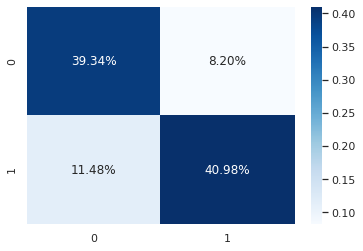

In [183]:
cf_matrix = confusion_matrix(y_test, rf.predict(x_test))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

Upon comparing the accuracy and F1 score for all models, both logistic regression and linear SVC seem like good model choices.

## Step 4: Model Evaluation (test set, metrics, graphs)
- Use only X_test for final evaluation
- Plot metrics (tables/figures)
- Final Result: Plot of training (train/val/test)

## Step 5: Model Deployment (inferences, visualization)
- Run test inferences and show visualizations (if any)